In [10]:
import numpy
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch_1 = unpickle("./cifar-10-batches-py/data_batch_1")
batch_2 = unpickle("./cifar-10-batches-py/data_batch_2")

In [4]:
def display_img(db, n):
    img = db[b"data"][n]
    img = numpy.swapaxes(img.reshape((32,32,3), order="F"),0,1)
    plt.imshow(img)
    print(db[b"labels"][n])

2


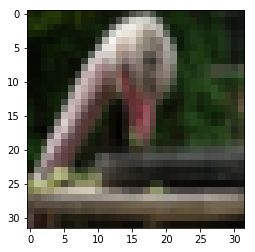

In [5]:
display_img(batch_1, 400)

In [18]:
x = batch_1[b"data"]
y = batch_1[b"labels"]
MLP = MLPClassifier(verbose=True, n_iter_no_change = 5, tol = 0.01)


In [14]:
predictions = clf.predict(batch_2[b"data"])
true_value = batch_2[b"labels"]
accuracy_score(true_value, predictions)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
parameters = {'hidden_layer_sizes':[(500,),(300,300)], 'learning_rate_init': [0.0001]}
clf = GridSearchCV(MLP, parameters, cv = 2, n_jobs = 4)
clf.fit(x,y)


In [22]:
from sklearn.metrics import classification_report
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = batch_2[b"labels"], clf.predict(batch_2[b"data"])
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'hidden_layer_sizes': (300,), 'learning_rate_init': 0.0001}

Grid scores on development set:

0.299 (+/-0.049) for {'hidden_layer_sizes': (300,), 'learning_rate_init': 0.0001}
0.247 (+/-0.107) for {'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.0001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.36      0.44      0.39       984
           1       0.38      0.45      0.41      1007
           2       0.29      0.03      0.05      1010
           3       0.22      0.30      0.25       995
           4       0.25      0.47      0.32      1010
           5       0.31      0.22      0.26       988
           6       0.39      0.22      0.28      1008
           7       0.42      0.36      0.39      1026
           8       0.48      0.39      0.43       987
           9